# Zero deficiency or non-zero deficiency?

In [1]:
import numpy as np 
import networkx as nx
import sympy as sp
from graph import Graph

In [2]:
def latex_dispaly(matrix):
    m = np.asarray(matrix)
    mat = sp.Matrix(m)
    if m.shape[0] != 1:
        display(mat.T)
    else:
        display(mat)

In [3]:
S = np.array([[-1, 1,-1, 1, 1, 0],
              [ 2,-2, 0, 0,-1, 1],
              [ 0, 0,-1, 1, 1, 0],
              [ 0, 0, 1,-1, 0,-1],
              [ 0, 0, 0, 0,-1, 1]])
latex_dispaly(S)

Matrix([
[-1,  2,  0,  0,  0],
[ 1, -2,  0,  0,  0],
[-1,  0, -1,  1,  0],
[ 1,  0,  1, -1,  0],
[ 1, -1,  1,  0, -1],
[ 0,  1,  0, -1,  1]])

### Reaction rank

In [4]:
# rank of matrix S
R = np.linalg.matrix_rank(S)

print('The reaction rank is: ', R)

The reaction rank is:  3


### Number of complexes

In [5]:
columns = S.shape[1]

complexes = []
reagents = []
products = []

# check each column for negative values
for c in range(columns):
    complex = []
    column = S[:,c]
    # looking for negative values
    complex = np.where(column < 0)[0]
    complexes.append(complex)
    reagents.append(complex)    # negative values means they are reagents


# check each column for positive values
for c in range(columns):
    complex = []
    column = S[:,c]
    complex = np.where(column > 0)[0]
    complexes.append(complex)
    products.append(complex)    # positive values means they are products


# in the indices list we put all the complexes we had found multiple times
indeces = []
for i in range(len(complexes)-1):
    for j in range(i+1,len(complexes)):
        if np.array_equal(complexes[i],complexes[j]) and j not in indeces:
            indeces.append(j)

# deleting the double complexes
for index in sorted(indeces, reverse=True):
    del complexes[index]


C = len(complexes)
print('Number of complexes =', C)

Number of complexes = 5


### Number of linkage classes

In [6]:
index_reagents = np.zeros(len(reagents))

# to each reagents we associate a complex
for i in range(len(reagents)):
    for j in range(len(complexes)):
        if np.array_equal(reagents[i],complexes[j]):
            index_reagents[i] = j 
            

index_products = np.zeros(len(products))

# to each products we associate a complex
for i in range(len(products)):
    for j in range(len(complexes)):
        if np.array_equal(products[i],complexes[j]):
            index_products[i] = j 
            
# ve create couples linking products and reagents
indeces = np.vstack((index_reagents,index_products)).T
indeces = indeces.astype(int)
indeces

array([[0, 1],
       [1, 0],
       [2, 3],
       [3, 2],
       [4, 2],
       [3, 4]])

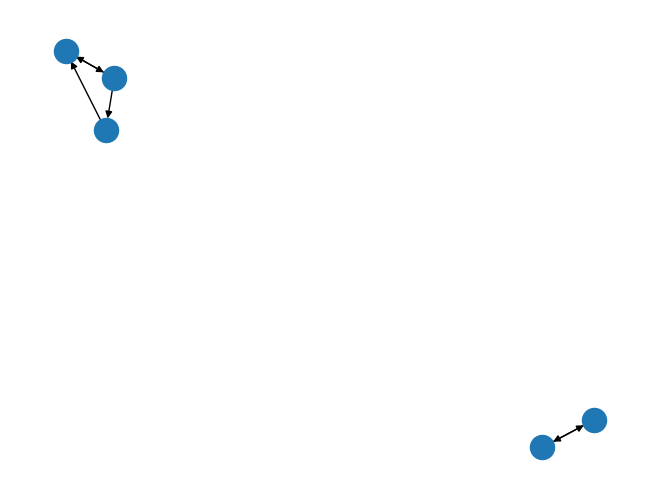

In [7]:
W = np.zeros((C,C))

# using the couples we find we can define a matrix representing the network
for indx in indeces:
    W[indx[0], indx[1]] = 1

G = Graph(W)
G.draw_graph()

In [8]:
L = G.number_connected_components()
print('The number of linkage classes is: ', L )

The number of linkage classes is:  2


### Deficiency

In [9]:
delta = C - L - R

print('Deficiency is:', delta)

Deficiency is: 0


### Weakly Reversability

In [10]:
if G.number_connected_components() == G.number_strongly_connected_components():
    print('The chemical reaction network is weakly reversible')
else:
    print('The chemical reaction network is NOT weakly reversible')



The chemical reaction network is weakly reversible
